In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates

In [2]:
!pip install pygal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.4/130.4 kB 2.8 MB/s eta 0:00:00


In [3]:
import pygal

In [4]:
from IPython.display import SVG, display, HTML


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
presentation_df = pd.read_csv('/content/drive/MyDrive/CodeOp/us_wildfires_filled.csv')

In [7]:
presentation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682341 entries, 0 to 1682340
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   OBJECTID                   1682341 non-null  int64  
 1   NWCG_REPORTING_AGENCY      1682341 non-null  object 
 2   NWCG_REPORTING_UNIT_ID     1682341 non-null  object 
 3   FIRE_NAME                  1682341 non-null  object 
 4   FIRE_YEAR                  1682341 non-null  int64  
 5   DISCOVERY_DATE             1682341 non-null  object 
 6   NWCG_CAUSE_CLASSIFICATION  1682341 non-null  object 
 7   NWCG_GENERAL_CAUSE         1682341 non-null  object 
 8   NWCG_CAUSE_AGE_CATEGORY    1682341 non-null  object 
 9   CONT_DATE                  1682341 non-null  object 
 10  FIRE_SIZE                  1682341 non-null  float64
 11  FIRE_SIZE_CLASS            1682341 non-null  object 
 12  LATITUDE                   1682341 non-null  float64
 13  LONGITUDE   

In [8]:
presentation_df['DISCOVERY_DATE'] = pd.to_datetime(presentation_df["DISCOVERY_DATE"], format = "%Y-%m-%d")
presentation_df['CONT_DATE'] = pd.to_datetime(presentation_df["CONT_DATE"], format = "%Y-%m-%d")

In [9]:
to_drop = ['OBJECTID', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'FIRE_NAME', 'NWCG_CAUSE_CLASSIFICATION', 'NWCG_CAUSE_AGE_CATEGORY', 'OWNER_DESCR']

presentation_df = presentation_df.drop(to_drop, axis=1)

In [10]:
presentation_df['COUNTY_STATE'] = presentation_df['COUNTY'] + str(" ") + presentation_df['STATE']

presentation_df.head()

,FIRE_YEAR,DISCOVERY_DATE,NWCG_GENERAL_CAUSE,CONT_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,DURATION,COUNTY,STATE,PRECIPITATION,TEMPERATURE,WIND_SPEED,ELEVATION,COUNTY_STATE
0,2005,2005-02-02,Power supply,2005-02-02,0.10,A,40.036944,-121.005833,0.0,Plumas County,CA,0.01,0.49,3.76,1728,Plumas County CA
1,2004,2004-05-12,Natural,2004-05-12,0.25,A,38.933056,-120.404444,0.0,El Dorado County,CA,0.00,13.36,2.62,1442,El Dorado County CA
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,A,38.984167,-120.735556,0.0,Placer County,CA,0.41,19.16,1.80,903,Placer County CA
3,2004,2004-06-28,Natural,2004-07-03,0.10,A,38.559167,-119.913333,5.0,Alpine County,CA,0.16,19.36,1.91,2630,Alpine County CA
4,2004,2004-06-28,Natural,2004-07-03,0.10,A,38.559167,-119.933056,5.0,Alpine County,CA,0.16,19.36,1.91,2630,Alpine County CA


In [11]:
presentation_df = presentation_df.drop('COUNTY', axis=1)

In [12]:
presentation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682341 entries, 0 to 1682340
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   FIRE_YEAR           1682341 non-null  int64         
 1   DISCOVERY_DATE      1682341 non-null  datetime64[ns]
 2   NWCG_GENERAL_CAUSE  1682341 non-null  object        
 3   CONT_DATE           1682341 non-null  datetime64[ns]
 4   FIRE_SIZE           1682341 non-null  float64       
 5   FIRE_SIZE_CLASS     1682341 non-null  object        
 6   LATITUDE            1682341 non-null  float64       
 7   LONGITUDE           1682341 non-null  float64       
 8   DURATION            1682341 non-null  float64       
 9   STATE               1682341 non-null  object        
 10  PRECIPITATION       1682341 non-null  float64       
 11  TEMPERATURE         1682341 non-null  float64       
 12  WIND_SPEED          1682341 non-null  float64       
 13  ELEVATION   

In [13]:
presentation_df.isna().sum()

FIRE_YEAR             0
DISCOVERY_DATE        0
NWCG_GENERAL_CAUSE    0
CONT_DATE             0
FIRE_SIZE             0
FIRE_SIZE_CLASS       0
LATITUDE              0
LONGITUDE             0
DURATION              0
STATE                 0
PRECIPITATION         0
TEMPERATURE           0
WIND_SPEED            0
ELEVATION             0
COUNTY_STATE          0
dtype: int64

# **INTRO PLOTS/INFO**

## Heat Map - Number of wildfires vs state





In [14]:
# Group by state and count the number of fires in each state
fires_by_state = presentation_df.groupby('STATE').size().reset_index(name='Number of Fires')

fires_by_state = fires_by_state.sort_values(by='Number of Fires', ascending=False)

fires_by_state

,STATE,Number of Fires
3,CA,182514
40,TX,167191
8,GA,121173
31,NY,94160
24,NC,91157
2,AZ,75034
7,FL,68885
4,CO,60923
37,SC,52556
22,MS,52108


In [15]:
fires_by_state['STATE'].nunique()

48

In [16]:
# List of all US states
all_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

# Extracting the states from the dataset
states_in_dataset = fires_by_state['STATE'].unique()

# Finding missing states
missing_states = [state for state in all_states if state not in states_in_dataset]

missing_states

['AK', 'CT', 'HI']

In [ ]:
# Plot heatmap
fig = px.choropleth(fires_by_state,
                    locations='STATE',
                    locationmode='USA-states',
                    color='Number of Fires',
                    scope='usa',
                    hover_data=['STATE', 'Number of Fires'],
                    color_continuous_scale='Reds',
                    labels={'Number of Fires': 'Number of Fires'}
                   )

fig.update_layout(title_text='Wildfires by State',
                  width=1200,
                  height=900, )
fig.show()

## Fire duration

In [18]:
# Calculate the percentage of each duration category
duration_counts = presentation_df['DURATION'].value_counts(normalize=True) * 100

duration_counts_df = pd.DataFrame({'Duration': duration_counts.index, 'Percentage': duration_counts.values})

# Find the maximum duration
max_duration = presentation_df['DURATION'].max()

duration_counts_df

,Duration,Percentage
0,0.0,88.912652
1,1.0,5.920322
2,2.0,1.497437
3,3.0,0.902433
4,4.0,0.463461
...,...,...
249,209.0,0.000059
250,143.0,0.000059
251,196.0,0.000059
252,202.0,0.000059


In [19]:
max_duration

364.0

In [ ]:
# Get the top 3 durations and their percentages
top_3 = duration_counts_df.head(3)
other_percentage = duration_counts_df.iloc[3:, :]['Percentage'].sum()

# Create a new DataFrame for the top 3 durations and the "more days" category
top_3_and_others = pd.concat([top_3, pd.DataFrame({'Duration': ['≥ 4.0'], 'Percentage': [other_percentage]})])

pie_chart = pygal.Pie(half_pie=True, width=300, height=200,
                      style=pygal.style.Style(
                      colors=('red', 'orange', 'yellow', 'brown'),
                      background='white',  # Set background to white
                      plot_background='white',  # Set plot background to white
                      legend_background='white'))

# naming the title
pie_chart.title = 'Wildfire duration in days'


# Add each duration and its percentage to the pie chart
for index, row in top_3_and_others.iterrows():
    label = '{}: {:.1f}%'.format(row['Duration'], row['Percentage'])
    pie_chart.add(str(row['Duration']), row['Percentage'])

# Render the chart as an SVG
chart = pie_chart.render(disable_xml_declaration=True)

# Add percentage labels outside the pie chart slices
for index, row in top_3_and_others.iterrows():
    label = '{}: {:.1f}%'.format(row['Duration'], row['Percentage'])
    chart = chart.replace(label, label + f" ({row['Percentage']:.1f}%)")

# Display the chart
display(HTML(chart))

## Fire size - Class





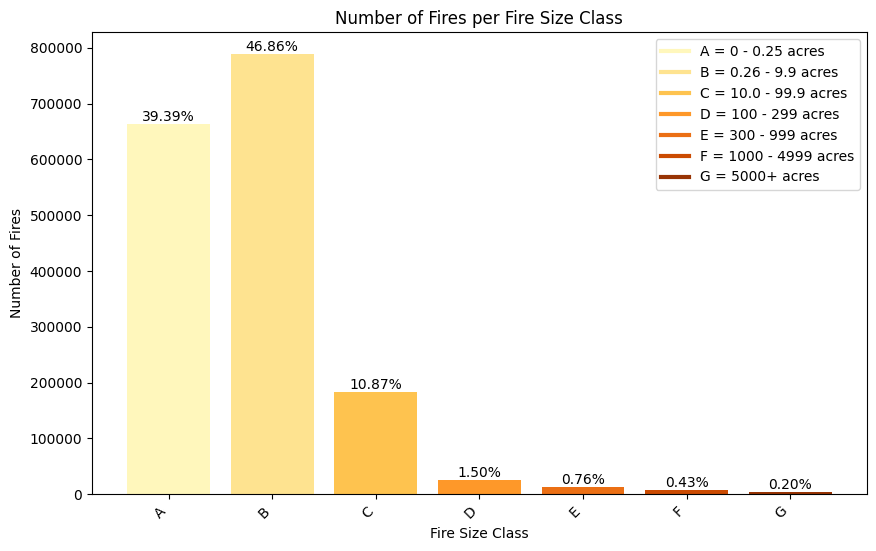

In [ ]:
fire_class_legend = { 'A' : 'A = 0 - 0.25 acres',
                     'B' : 'B = 0.26 - 9.9 acres',
                     'C' : 'C = 10.0 - 99.9 acres',
                     'D' : 'D = 100 - 299 acres',
                     'E' : 'E = 300 - 999 acres',
                     'F' : 'F = 1000 - 4999 acres',
                     'G' : 'G = 5000+ acres'}

fire_class_counts = presentation_df['FIRE_SIZE_CLASS'].value_counts().reset_index()
fire_class_counts.columns = ['Fire Size Class', 'Number of Fires']
fire_class_counts = fire_class_counts.sort_values(by='Fire Size Class', ascending=True)

# Plotting the bar plot
class_palette = sns.color_palette("YlOrBr", n_colors=len(fire_class_counts['Fire Size Class']))
plt.figure(figsize=(10, 6))

bars = plt.bar(fire_class_counts['Fire Size Class'], fire_class_counts['Number of Fires'], color=class_palette)

# Create custom legend handles and labels
legend_handles = [plt.Line2D([0], [0], color=color, linewidth=3, linestyle='-') for color in class_palette]
legend_labels = [fire_class_legend[fire_class] for fire_class in fire_class_counts['Fire Size Class']]

# Add the legend
plt.legend(legend_handles, legend_labels, loc='upper right')

# Annotate each bar with the percentage
for bar in bars:
    height = bar.get_height()
    percentage = height / fire_class_counts['Number of Fires'].sum() * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.xlabel('Fire Size Class')
plt.ylabel('Number of Fires')
plt.title('Number of Fires per Fire Size Class')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

 0.25 acres = tennis court, including the playing area and surrounding space (?)

 9.9 acres = 5.6 soccer fields (?)

 99.9 acres = 56 soccer fields (?)

In [20]:
presentation_df['FIRE_SIZE'].max()

662700.0

## Million acres burnt per year versus cost

In [ ]:
# Group by FIRE_YEAR and sum the FIRE_SIZE column
acres_burnt_per_year = presentation_df.groupby('FIRE_YEAR')['FIRE_SIZE'].sum().reset_index()

acres_burnt_per_year.columns = ['FIRE_YEAR', 'Total Acres Burnt']

acres_burnt_per_year = acres_burnt_per_year.sort_values(by='FIRE_YEAR', ascending=True)

# Make 'FIRE_YEAR' the index of the DataFrame
#acres_burnt_per_year.set_index('FIRE_YEAR', inplace=True)

# Convert 'Total Acres Burnt' column from scientific notation to decimal notation with 3 decimal places
acres_burnt_per_year['Total Acres Burnt'] = acres_burnt_per_year['Total Acres Burnt'] / 1e6  # Convert from millions to regular units
acres_burnt_per_year['Total Acres Burnt'] = acres_burnt_per_year['Total Acres Burnt'].apply(lambda x: "{:.3f}".format(x))  # Format values with 3 decimal places


In [ ]:
acres_burnt_per_year

,FIRE_YEAR,Total Acres Burnt
0,2000,7.013
1,2001,3.598
2,2002,4.629
3,2003,3.865
4,2004,1.643
5,2005,5.001
6,2006,9.799
7,2007,8.579
8,2008,5.326
9,2009,3.124


In [ ]:
acres_burnt_per_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FIRE_YEAR          21 non-null     int64 
 1   Total Acres Burnt  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [ ]:
costs_df = pd.read_excel('/content/drive/MyDrive/CodeOp/Wildfires_Costs.xlsx')

In [ ]:
costs_df

,Year,Fires,Acres,ForestService,DOIAgencies,Total,Avg. Annual U.S. Temperature (F)
0,1985,82591,2896147,161505000,78438000,239943000,51.30
1,1986,85907,2719162,111625000,91153000,202778000,53.32
2,1987,71300,2447296,253657000,81452000,335109000,53.33
3,1988,72750,5009290,429609000,149317000,578926000,52.63
4,1989,48949,1827310,331672000,168115000,499787000,51.84
5,1990,66481,4621621,253700000,144252000,397952000,53.51
6,1991,75754,2953578,132300000,73820000,206120000,53.16
7,1992,87394,2069929,290300000,87166000,377466000,52.60
8,1993,58810,1797574,184000000,56436000,240436000,51.26
9,1994,79107,4073579,757200000,161135000,918335000,52.87


In [ ]:
costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              36 non-null     int64  
 1   Fires                             36 non-null     int64  
 2   Acres                             36 non-null     int64  
 3   ForestService                     36 non-null     int64  
 4   DOIAgencies                       36 non-null     int64  
 5   Total                             36 non-null     int64  
 6   Avg. Annual U.S. Temperature (F)  36 non-null     float64
dtypes: float64(1), int64(6)
memory usage: 2.1 KB


In [ ]:
costs_years = dict(zip(costs_df['Year'], costs_df['Total']))

acres_burnt_per_year['COST'] = acres_burnt_per_year['FIRE_YEAR'].map(costs_years)

acres_burnt_per_year

,FIRE_YEAR,Total Acres Burnt,COST
0,2000,7.013,1410802000
1,2001,3.598,952696000
2,2002,4.629,1674040000
3,2003,3.865,1327138000
4,2004,1.643,1007244000
5,2005,5.001,818954000
6,2006,9.799,1704477000
7,2007,8.579,1620145000
8,2008,5.326,1585856000
9,2009,3.124,920529000


In [ ]:
# Convert 'COST' column from scientific notation to decimal notation with 3 decimal places
acres_burnt_per_year['COST'] = acres_burnt_per_year['COST'] / 1e8  # Convert from billions to regular units
acres_burnt_per_year['COST'] = acres_burnt_per_year['COST'].apply(lambda x: "{:.3f}".format(x))  # Format values with 3 decimal places

acres_burnt_per_year

,FIRE_YEAR,Total Acres Burnt,COST
0,2000,7.013,14.108
1,2001,3.598,9.527
2,2002,4.629,16.740
3,2003,3.865,13.271
4,2004,1.643,10.072
5,2005,5.001,8.190
6,2006,9.799,17.045
7,2007,8.579,16.201
8,2008,5.326,15.859
9,2009,3.124,9.205


In [ ]:
acres_burnt_per_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FIRE_YEAR          21 non-null     int64 
 1   Total Acres Burnt  21 non-null     object
 2   COST               21 non-null     object
dtypes: int64(1), object(2)
memory usage: 632.0+ bytes


In [ ]:
acres_burnt_per_year['Total Acres Burnt'] = acres_burnt_per_year['Total Acres Burnt'].astype(float)
acres_burnt_per_year['COST'] = acres_burnt_per_year['COST'].astype(float)
acres_burnt_per_year['FIRE_YEAR'] = pd.to_datetime(acres_burnt_per_year['FIRE_YEAR'], format='%Y')


In [ ]:
acres_burnt_per_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FIRE_YEAR          21 non-null     datetime64[ns]
 1   Total Acres Burnt  21 non-null     float64       
 2   COST               21 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 632.0 bytes


In [ ]:
acres_burnt_per_year.min()

FIRE_YEAR            2000-01-01 00:00:00
Total Acres Burnt                  1.643
COST                               8.095
dtype: object

In [ ]:
acres_burnt_per_year.max()

FIRE_YEAR            2020-01-01 00:00:00
Total Acres Burnt                 10.308
COST                              31.433
dtype: object

In [ ]:
acres_burnt_per_year['Total Acres Burnt'].sum()

119.80099999999999

In [ ]:
acres_burnt_per_year.describe()

,FIRE_YEAR,Total Acres Burnt,COST
count,21,21.000000,21.000000
mean,2009-12-31 20:34:17.142857216,5.704810,16.382238
min,2000-01-01 00:00:00,1.643000,8.095000
25%,2005-01-01 00:00:00,3.443000,13.271000
50%,2010-01-01 00:00:00,5.001000,15.900000
75%,2015-01-01 00:00:00,8.579000,19.024000
max,2020-01-01 00:00:00,10.308000,31.433000
std,NaN,2.834913,6.216115


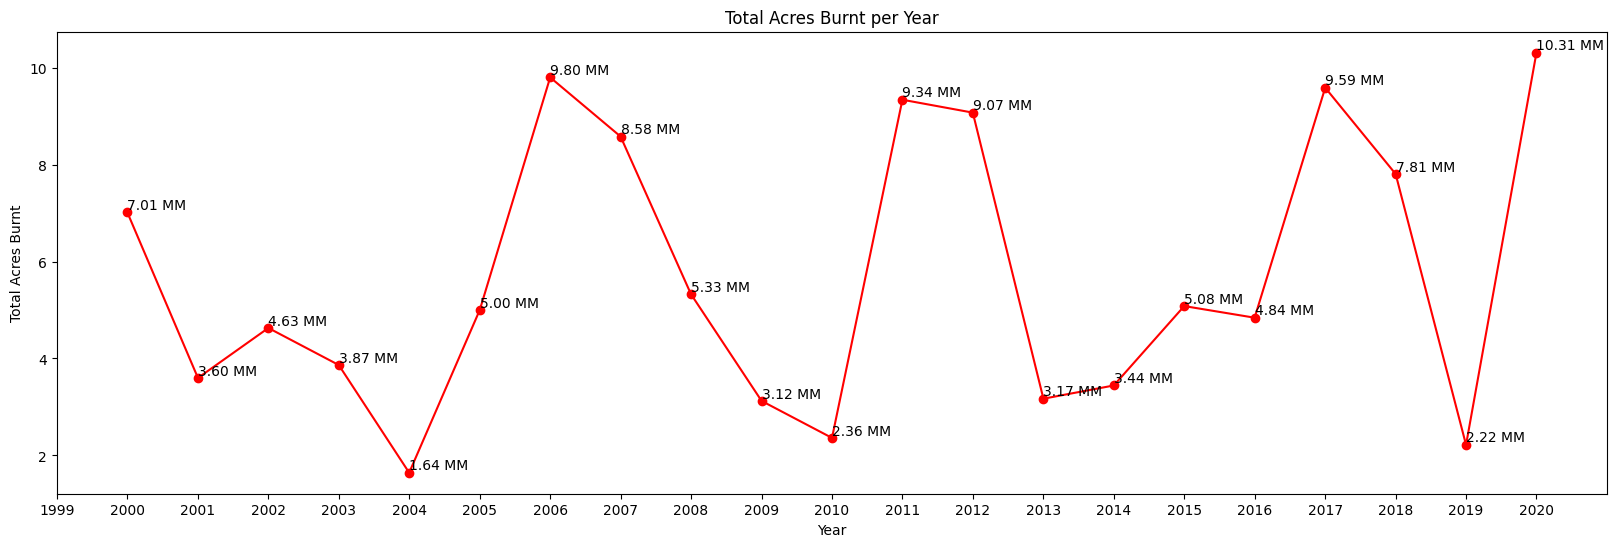

In [ ]:
# Plotting the time series graph
plt.figure(figsize=(20, 6))
plt.plot(acres_burnt_per_year['FIRE_YEAR'], acres_burnt_per_year['Total Acres Burnt'], marker = 'o', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Acres Burnt')
plt.title('Total Acres Burnt per Year')

# Manually setting the limits of the y-axis
#plt.ylim(1, 11)

# Set the x-axis tick locators and formatters to display only full years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add annotations for each marker
for x, y in zip(acres_burnt_per_year['FIRE_YEAR'], acres_burnt_per_year['Total Acres Burnt']):
    plt.text(x, y, f'{y:.2f} MM', ha='left', va='bottom')

# Show plot
plt.grid(False)
plt.show()

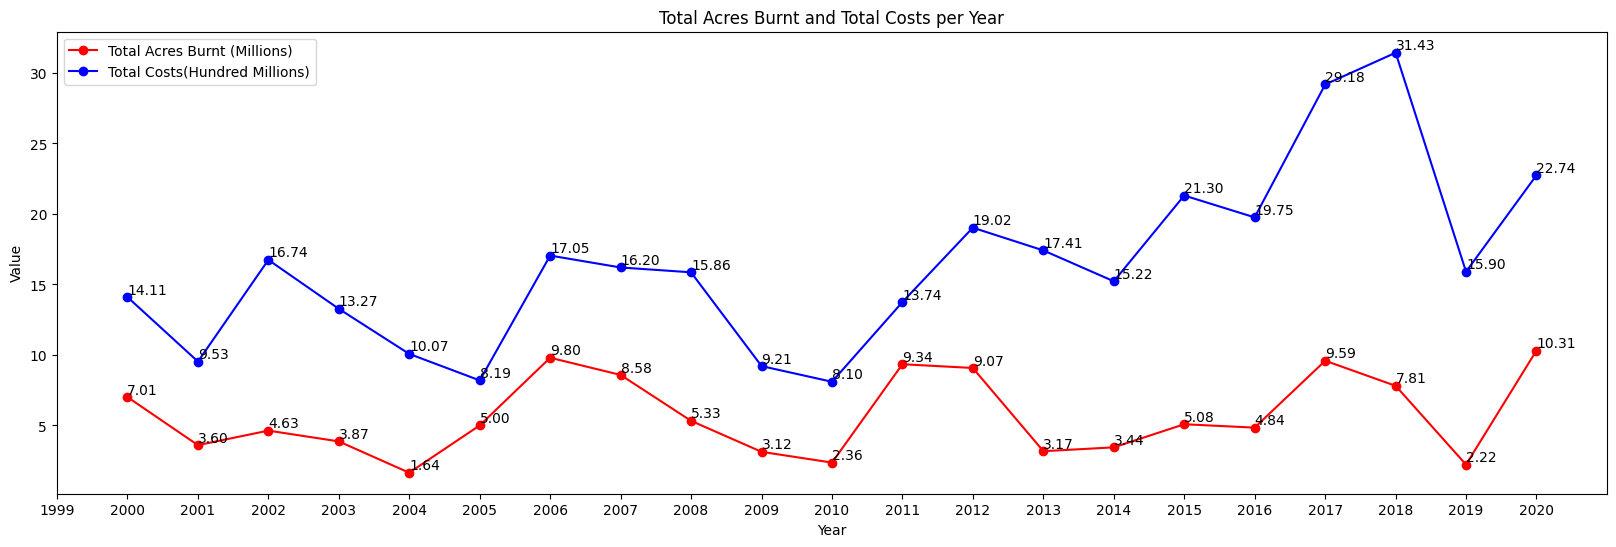

In [ ]:

# Plotting the time series graph
plt.figure(figsize=(20, 6))

# Plotting Total Acres Burnt
plt.plot(acres_burnt_per_year['FIRE_YEAR'], acres_burnt_per_year['Total Acres Burnt'], marker='o', color='red', label='Total Acres Burnt (Millions)')

# Plotting Total Costs
plt.plot(acres_burnt_per_year['FIRE_YEAR'], acres_burnt_per_year['COST'], marker='o', color='blue', label='Total Costs(Hundred Millions)')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Total Acres Burnt and Total Costs per Year')

# Set the x-axis tick locators and formatters to display only full years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add annotations for each marker on Total Acres Burnt
for x, y in zip(acres_burnt_per_year['FIRE_YEAR'], acres_burnt_per_year['Total Acres Burnt']):
    plt.text(x, y, f'{y:.2f}', ha='left', va='bottom')

# Add annotations for each marker on Total Costs
for x, y in zip(acres_burnt_per_year['FIRE_YEAR'], acres_burnt_per_year['COST']):
    plt.text(x, y, f'{y:.2f}', ha='left', va='bottom')

# Display legend
plt.legend()

# Show plot
plt.grid(False)
plt.show()


## Day of the week

In [ ]:
presentation_df['DAY_WEEK'] = presentation_df['DISCOVERY_DATE'].dt.dayofweek

# Map the integers to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
presentation_df['DAY_WEEK'] = presentation_df['DAY_WEEK'].map(lambda x: day_names[x])

presentation_df.head()

,FIRE_YEAR,DISCOVERY_DATE,NWCG_GENERAL_CAUSE,CONT_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,DURATION,STATE,PRECIPITATION,TEMPERATURE,WIND_SPEED,ELEVATION,COUNTY_STATE,DAY_WEEK
0,2005,2005-02-02,Power supply,2005-02-02,0.10,A,40.036944,-121.005833,0.0,CA,0.01,0.49,3.76,1728,Plumas County CA,Wednesday
1,2004,2004-05-12,Natural,2004-05-12,0.25,A,38.933056,-120.404444,0.0,CA,0.00,13.36,2.62,1442,El Dorado County CA,Wednesday
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,A,38.984167,-120.735556,0.0,CA,0.41,19.16,1.80,903,Placer County CA,Monday
3,2004,2004-06-28,Natural,2004-07-03,0.10,A,38.559167,-119.913333,5.0,CA,0.16,19.36,1.91,2630,Alpine County CA,Monday
4,2004,2004-06-28,Natural,2004-07-03,0.10,A,38.559167,-119.933056,5.0,CA,0.16,19.36,1.91,2630,Alpine County CA,Monday


<ipython-input-37-046f6cf83ea5>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




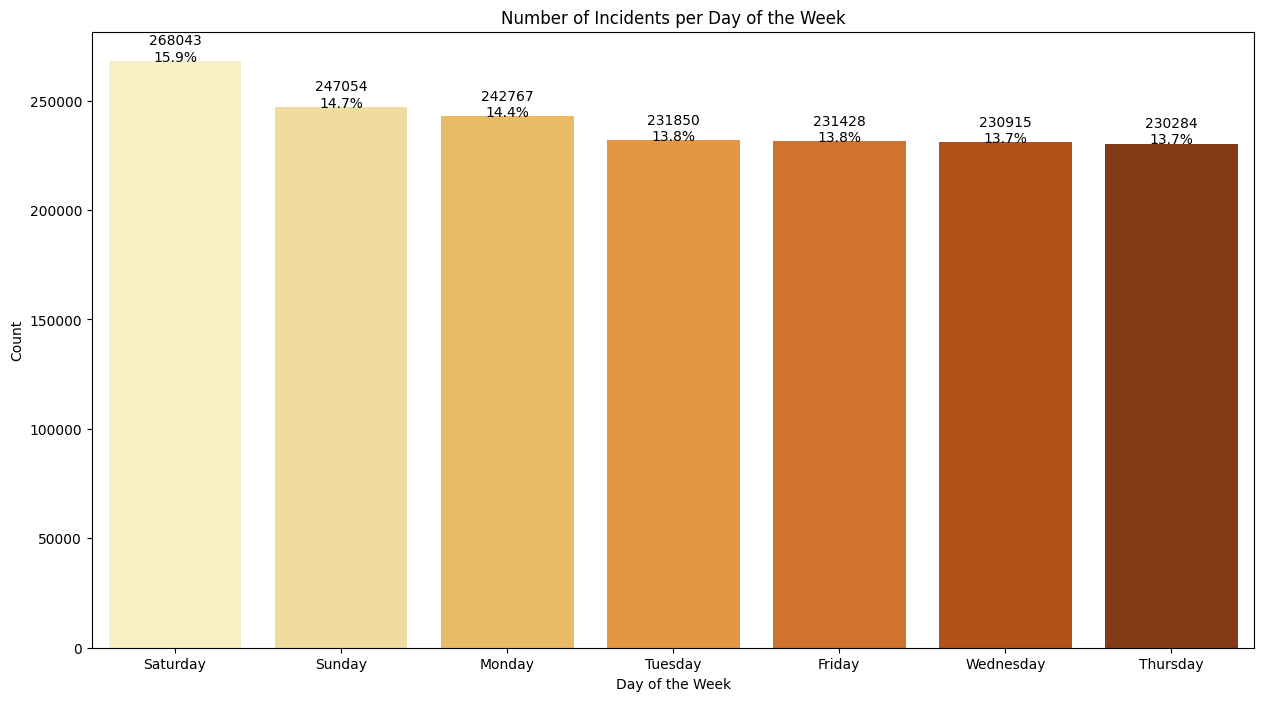

In [ ]:
# Calculate value counts for each day of the week
day_counts = presentation_df['DAY_WEEK'].value_counts()

# Calculate percentages
total_days = day_counts.sum()
day_percentages = (day_counts / total_days) * 100

# Plotting the count plot
plt.figure(figsize=(15, 8))
sns.countplot(
    data=presentation_df,
    x="DAY_WEEK",
    order=day_counts.index,  # Ensure correct ordering of days
    palette='YlOrBr'  # Choose a color palette
)

# Display values and percentages above each bar
for i, count in enumerate(day_counts):
    plt.text(i, count + 0.5, f"{count}\n{day_percentages[i]:.1f}%", ha='center')

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Number of Incidents per Day of the Week')

# Show plot
plt.show()

This graph wouldn't be for the presentation, just to check if the days of the week are relevant, but they aren't.

# **MODEL**

## How we picked the categories - Confusion Matrix

ready in other notebooks - take them from there

## F1 scores - Different models

ready in other notebooks - take them from there

# **FIRE CAUSES - EDA**

- Debris and open burning

- Firearms and explosives use

- Natural

- Fireworks


In [ ]:
presentation_df.columns

Index(['FIRE_YEAR', 'DISCOVERY_DATE', 'NWCG_GENERAL_CAUSE', 'CONT_DATE',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'DURATION',
       'STATE', 'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'COUNTY_STATE', 'DAY_WEEK'],
      dtype='object')

In [ ]:
presentation_df['DAY_YEAR'] = presentation_df['DISCOVERY_DATE'].dt.dayofyear

presentation_df.head()

,FIRE_YEAR,DISCOVERY_DATE,NWCG_GENERAL_CAUSE,CONT_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,DURATION,STATE,PRECIPITATION,TEMPERATURE,WIND_SPEED,ELEVATION,COUNTY_STATE,DAY_WEEK,DAY_YEAR
0,2005,2005-02-02,Power supply,2005-02-02,0.10,A,40.036944,-121.005833,0.0,CA,0.01,0.49,3.76,1728,Plumas County CA,Wednesday,33
1,2004,2004-05-12,Natural,2004-05-12,0.25,A,38.933056,-120.404444,0.0,CA,0.00,13.36,2.62,1442,El Dorado County CA,Wednesday,133
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,A,38.984167,-120.735556,0.0,CA,0.41,19.16,1.80,903,Placer County CA,Monday,152
3,2004,2004-06-28,Natural,2004-07-03,0.10,A,38.559167,-119.913333,5.0,CA,0.16,19.36,1.91,2630,Alpine County CA,Monday,180
4,2004,2004-06-28,Natural,2004-07-03,0.10,A,38.559167,-119.933056,5.0,CA,0.16,19.36,1.91,2630,Alpine County CA,Monday,180


In [ ]:
presentation_df['NWCG_GENERAL_CAUSE'] = presentation_df['NWCG_GENERAL_CAUSE'].replace({'Railroad operations and maintenance': 'Infrastructure-related causes',
                                                                     'Power supply': 'Infrastructure-related causes',
                                                                     'Equipment and vehicle use': 'Infrastructure-related causes',
                                                                     'Smoking': 'Erratic',
                                                                     'Misuse of fire by a minor': 'Erratic'})

presentation_df = presentation_df[~presentation_df['NWCG_GENERAL_CAUSE'].isin(['Other causes', 'Undetermined'])]

presentation_df['NWCG_GENERAL_CAUSE'].value_counts()

NWCG_GENERAL_CAUSE
Debris and open burning          405877
Natural                          231547
Arson                            219102
Infrastructure-related causes    190808
Erratic                           85558
Recreation and ceremony           69984
Fireworks                         15376
Firearms and explosives use        2423
Name: count, dtype: int64

In [ ]:
cause_precipitation_mean = presentation_df.groupby('NWCG_GENERAL_CAUSE')['PRECIPITATION'].mean()

cause_precipitation_mean

NWCG_GENERAL_CAUSE
Arson                            0.838391
Debris and open burning          0.747788
Erratic                          0.623897
Firearms and explosives use      0.249798
Fireworks                        0.714612
Infrastructure-related causes    0.790041
Natural                          2.027994
Recreation and ceremony          0.692833
Name: PRECIPITATION, dtype: float64

No rain Rainfall amount realised in a day is 0.0 mm

Very Light Rain Rainfall amount realised in a day is between 0.1 to 0.9 mm

Light Rain Rainfall amount realised in a day is between 1.0 mm to 10 mm

Moderate Rain Rainfall amount realised in a day is between 11 to 30 mm

Heavy Rain Rainfall amount realised in a day is between 31.0 to 70.0 mm

Very Heavy Rain Rainfall amount realised in a day is between 71.0 to 150 mm

Extremely Heavy Rain Rainfall amount realised in a day is equal or more than 151 mm

Rainy Day Rainfall amount realised in a day is 1.0 mm or more.

In [ ]:
cause_precipitation_median = presentation_df.groupby('NWCG_GENERAL_CAUSE')['PRECIPITATION'].median().reset_index()

cause_precipitation_median

,NWCG_GENERAL_CAUSE,PRECIPITATION
0,Arson,0.01
1,Debris and open burning,0.01
2,Erratic,0.01
3,Firearms and explosives use,0.00
4,Fireworks,0.04
5,Infrastructure-related causes,0.01
6,Natural,0.76
7,Recreation and ceremony,0.02


<ipython-input-43-4b661753c386>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




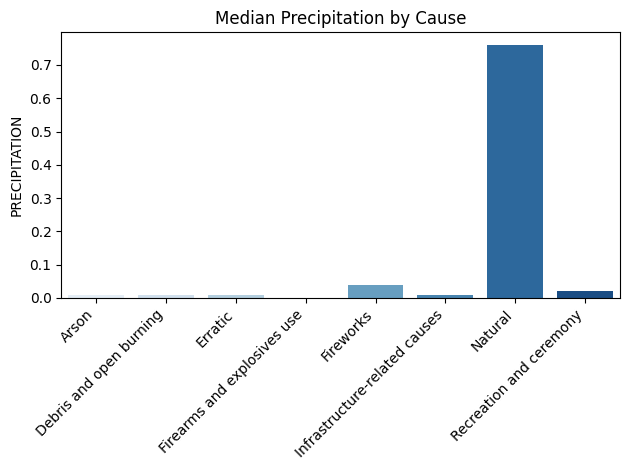

In [ ]:
# Plot
sns.barplot(data=cause_precipitation_median, x='NWCG_GENERAL_CAUSE', y='PRECIPITATION', palette='Blues')

plt.xlabel('')
plt.ylabel('PRECIPITATION')
plt.title('Median Precipitation by Cause')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
cause_temperature_mean = presentation_df.groupby('NWCG_GENERAL_CAUSE')['TEMPERATURE'].mean()

cause_temperature_mean

NWCG_GENERAL_CAUSE
Arson                            14.986222
Debris and open burning          14.421400
Erratic                          15.607509
Firearms and explosives use      19.827078
Fireworks                        20.601639
Infrastructure-related causes    17.799953
Natural                          21.997342
Recreation and ceremony          15.253260
Name: TEMPERATURE, dtype: float64

In [ ]:
cause_temperature_median = presentation_df.groupby('NWCG_GENERAL_CAUSE')['TEMPERATURE'].median().reset_index()

cause_temperature_median

,NWCG_GENERAL_CAUSE,TEMPERATURE
0,Arson,14.66
1,Debris and open burning,13.74
2,Erratic,15.71
3,Firearms and explosives use,20.68
4,Fireworks,21.74
5,Infrastructure-related causes,18.62
6,Natural,22.52
7,Recreation and ceremony,15.78


<ipython-input-46-10f33eb276da>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




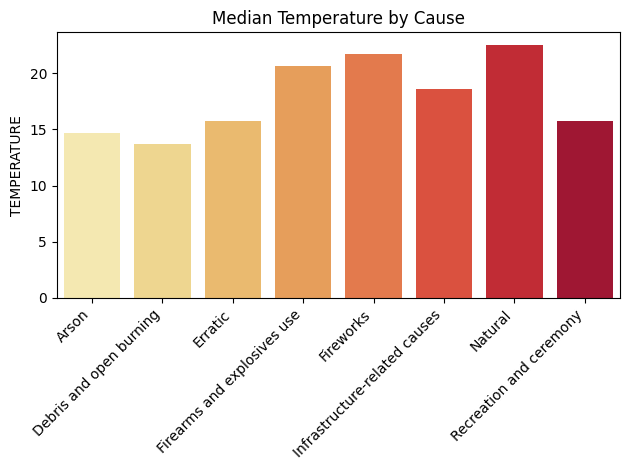

In [ ]:
# Plot
sns.barplot(data=cause_temperature_median, x='NWCG_GENERAL_CAUSE', y='TEMPERATURE', palette='YlOrRd')

plt.xlabel('')
plt.ylabel('TEMPERATURE')
plt.title('Median Temperature by Cause')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

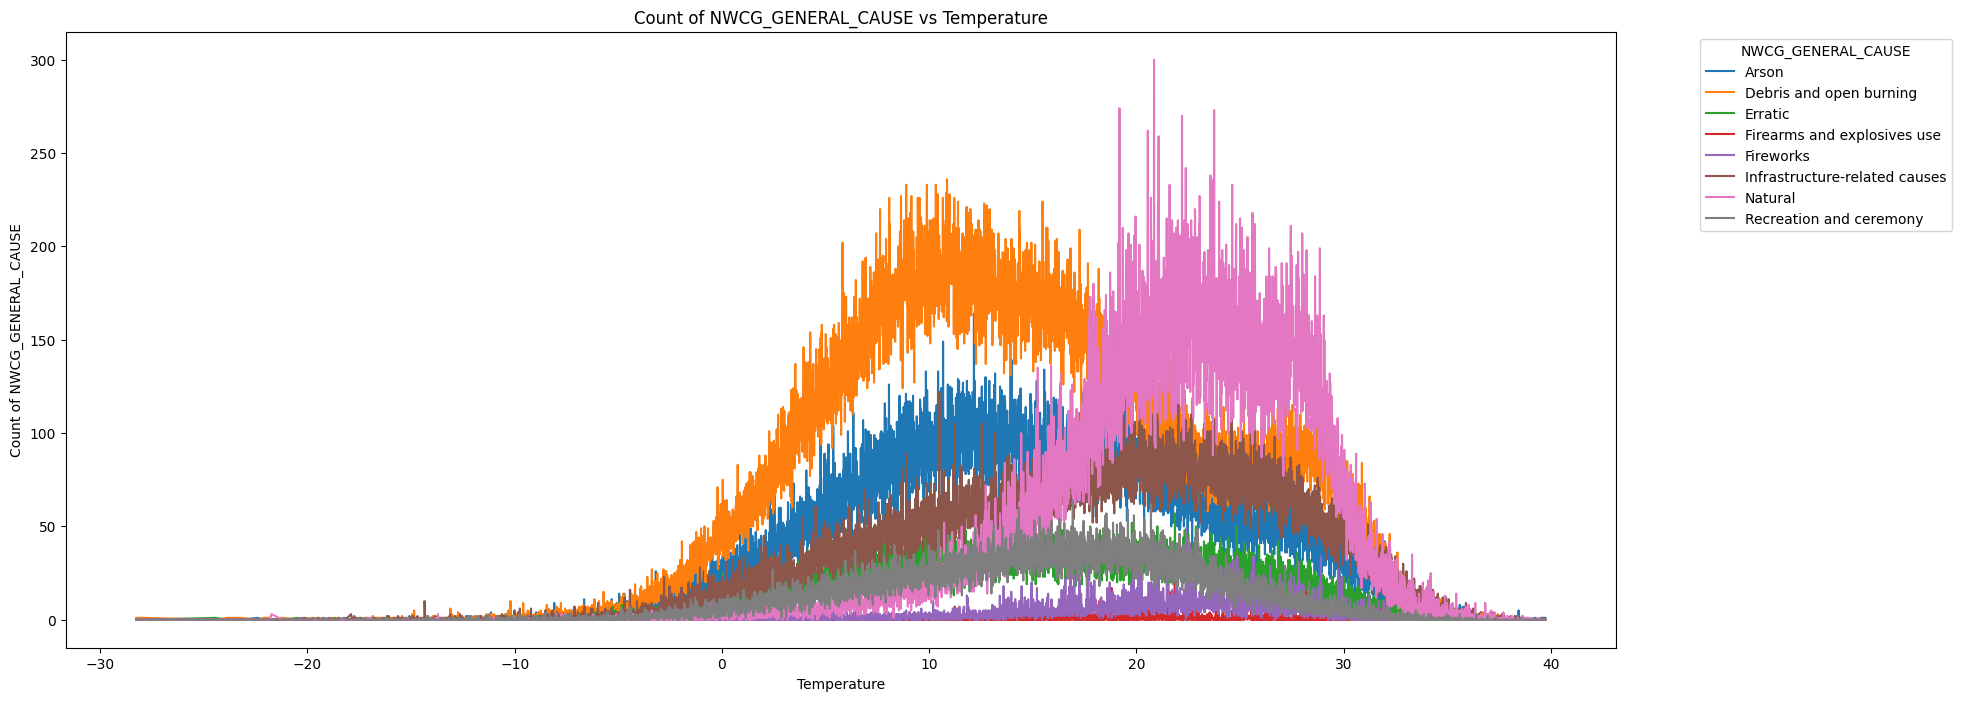

In [ ]:
plt.figure(figsize=(20, 8))

# Group the data by 'TEMPERATURE' and 'NWCG_GENERAL_CAUSE', and count occurrences
grouped_data = presentation_df.groupby(['TEMPERATURE', 'NWCG_GENERAL_CAUSE']).size().unstack(fill_value=0)

# Plot the data
for column in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[column], label=column)

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Count of NWCG_GENERAL_CAUSE')
plt.title('Count of NWCG_GENERAL_CAUSE vs Temperature')

# Add legend
plt.legend(title='NWCG_GENERAL_CAUSE', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.grid(False)
plt.show()

<Axes: xlabel='TEMPERATURE', ylabel='Density'>

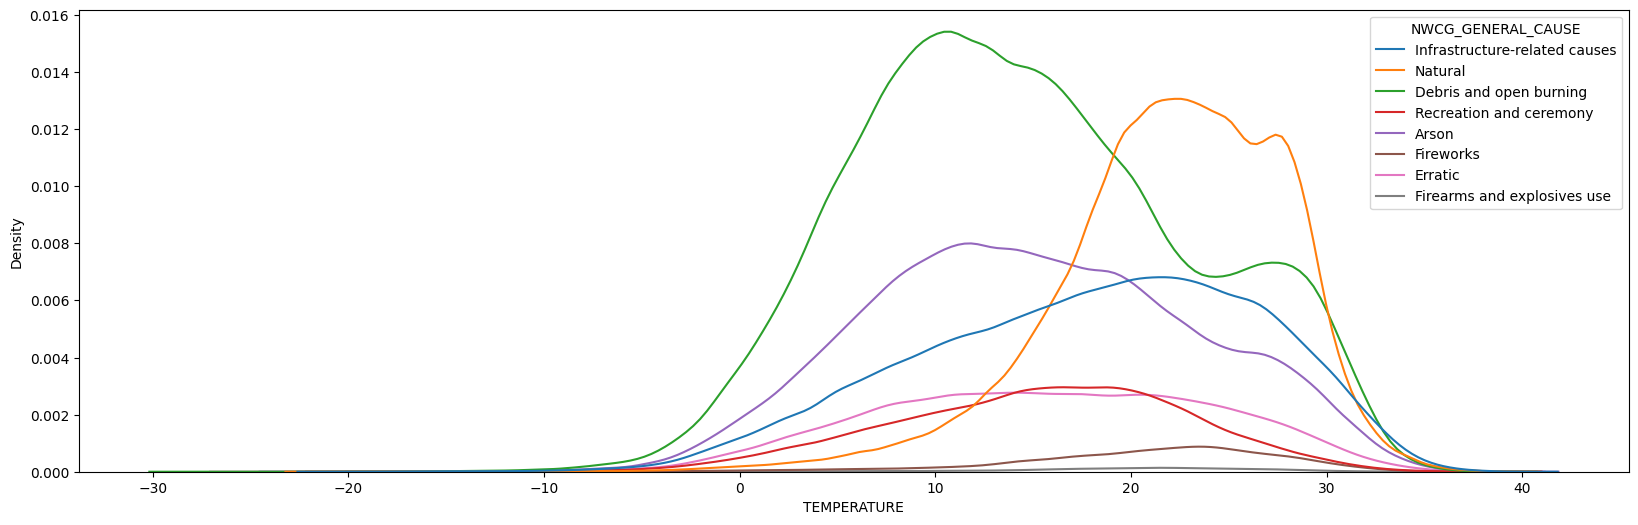

In [ ]:
plt.figure(figsize=(20, 6))
sns.kdeplot(data=presentation_df, x="TEMPERATURE", hue="NWCG_GENERAL_CAUSE")

In [ ]:
cause_wind_mean = presentation_df.groupby('NWCG_GENERAL_CAUSE')['WIND_SPEED'].mean()

cause_wind_mean

NWCG_GENERAL_CAUSE
Arson                            3.125186
Debris and open burning          3.172082
Erratic                          3.377302
Firearms and explosives use      3.069158
Fireworks                        3.445631
Infrastructure-related causes    3.512092
Natural                          2.685798
Recreation and ceremony          2.912091
Name: WIND_SPEED, dtype: float64

In [ ]:
cause_wind_median = presentation_df.groupby('NWCG_GENERAL_CAUSE')['WIND_SPEED'].median().reset_index()

cause_wind_median

,NWCG_GENERAL_CAUSE,WIND_SPEED
0,Arson,2.70
1,Debris and open burning,2.81
2,Erratic,2.97
3,Firearms and explosives use,2.81
4,Fireworks,3.14
5,Infrastructure-related causes,3.08
6,Natural,2.39
7,Recreation and ceremony,2.52


<ipython-input-51-1b53b0169cc2>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




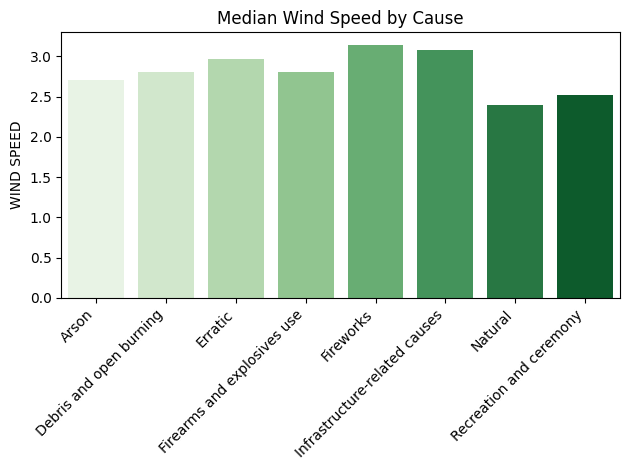

In [ ]:
# Plot
sns.barplot(data=cause_wind_median, x='NWCG_GENERAL_CAUSE', y='WIND_SPEED', palette='Greens')

plt.xlabel('')
plt.ylabel('WIND SPEED')
plt.title('Median Wind Speed by Cause')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
cause_elevation_mean = presentation_df.groupby('NWCG_GENERAL_CAUSE')['ELEVATION'].mean()

cause_elevation_mean

NWCG_GENERAL_CAUSE
Arson                             278.028754
Debris and open burning           291.987735
Erratic                           376.189439
Firearms and explosives use       980.800248
Fireworks                         789.284274
Infrastructure-related causes     439.372930
Natural                          1170.675526
Recreation and ceremony           815.658179
Name: ELEVATION, dtype: float64

In [ ]:
cause_elevation_median = presentation_df.groupby('NWCG_GENERAL_CAUSE')['ELEVATION'].median().reset_index()

cause_elevation_median

,NWCG_GENERAL_CAUSE,ELEVATION
0,Arson,187.0
1,Debris and open burning,157.0
2,Erratic,185.0
3,Firearms and explosives use,907.0
4,Fireworks,692.0
5,Infrastructure-related causes,260.0
6,Natural,1273.0
7,Recreation and ceremony,517.0


<ipython-input-54-a4a3d13661d6>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




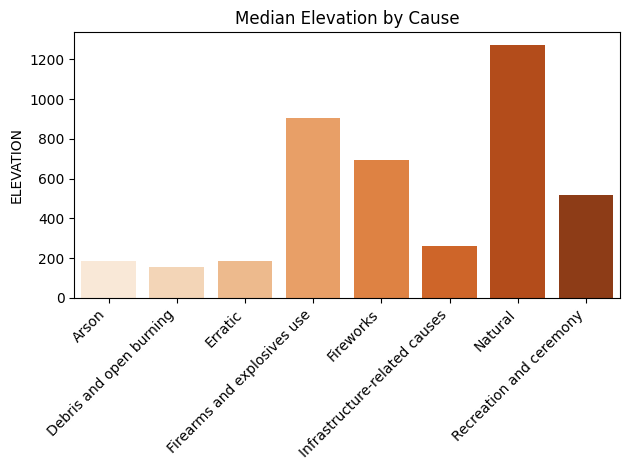

In [ ]:
# Plot
sns.barplot(data=cause_elevation_median, x='NWCG_GENERAL_CAUSE', y='ELEVATION', palette='Oranges')

plt.xlabel('')
plt.ylabel('ELEVATION')
plt.title('Median Elevation by Cause')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
cause_size_sum= presentation_df.groupby('NWCG_GENERAL_CAUSE')['FIRE_SIZE'].sum().reset_index()

cause_size_sum.rename(columns={'FIRE_SIZE': 'SUM_FIRE_SIZE'}, inplace=True)

cause_size_sum

,NWCG_GENERAL_CAUSE,SUM_FIRE_SIZE
0,Arson,7.413946e+06
1,Debris and open burning,5.894458e+06
2,Erratic,9.595132e+05
3,Firearms and explosives use,5.903436e+05
4,Fireworks,4.116509e+05
5,Infrastructure-related causes,1.155973e+07
6,Natural,6.035004e+07
7,Recreation and ceremony,4.074394e+06


In [ ]:
cause_size_mean= presentation_df.groupby('NWCG_GENERAL_CAUSE')['FIRE_SIZE'].mean().reset_index()

cause_size_mean.rename(columns={'FIRE_SIZE': 'MEAN_FIRE_SIZE'}, inplace=True)

cause_size_mean

,NWCG_GENERAL_CAUSE,MEAN_FIRE_SIZE
0,Arson,33.837876
1,Debris and open burning,14.522770
2,Erratic,11.214769
3,Firearms and explosives use,243.641605
4,Fireworks,26.772298
5,Infrastructure-related causes,60.583046
6,Natural,260.638398
7,Recreation and ceremony,58.218934


In [ ]:
cause_size_median= presentation_df.groupby('NWCG_GENERAL_CAUSE')['FIRE_SIZE'].median().reset_index()

cause_size_median.rename(columns={'FIRE_SIZE': 'MEDIAN_FIRE_SIZE'}, inplace=True)

cause_size_median

,NWCG_GENERAL_CAUSE,MEDIAN_FIRE_SIZE
0,Arson,1.5
1,Debris and open burning,1.0
2,Erratic,0.3
3,Firearms and explosives use,1.7
4,Fireworks,0.2
5,Infrastructure-related causes,1.0
6,Natural,0.2
7,Recreation and ceremony,0.1


In [ ]:
merged_df_size = pd.merge(cause_size_median, cause_size_mean, on='NWCG_GENERAL_CAUSE', how='inner')

merged_df_size = pd.merge(merged_df_size, cause_size_sum, on='NWCG_GENERAL_CAUSE', how='inner')


merged_df_size

,NWCG_GENERAL_CAUSE,MEDIAN_FIRE_SIZE,MEAN_FIRE_SIZE,SUM_FIRE_SIZE
0,Arson,1.5,33.837876,7.413946e+06
1,Debris and open burning,1.0,14.522770,5.894458e+06
2,Erratic,0.3,11.214769,9.595132e+05
3,Firearms and explosives use,1.7,243.641605,5.903436e+05
4,Fireworks,0.2,26.772298,4.116509e+05
5,Infrastructure-related causes,1.0,60.583046,1.155973e+07
6,Natural,0.2,260.638398,6.035004e+07
7,Recreation and ceremony,0.1,58.218934,4.074394e+06


In [ ]:
merged_df_size['SUM_FIRE_SIZE'] = merged_df_size['SUM_FIRE_SIZE'] / 1e5  # Convert from millions to regular units

merged_df_size['SUM_FIRE_SIZE']  = merged_df_size['SUM_FIRE_SIZE'].astype(float)

merged_df_size

,NWCG_GENERAL_CAUSE,MEDIAN_FIRE_SIZE,MEAN_FIRE_SIZE,SUM_FIRE_SIZE
0,Arson,1.5,33.837876,74.139462
1,Debris and open burning,1.0,14.522770,58.944583
2,Erratic,0.3,11.214769,9.595132
3,Firearms and explosives use,1.7,243.641605,5.903436
4,Fireworks,0.2,26.772298,4.116509
5,Infrastructure-related causes,1.0,60.583046,115.597298
6,Natural,0.2,260.638398,603.500392
7,Recreation and ceremony,0.1,58.218934,40.743939


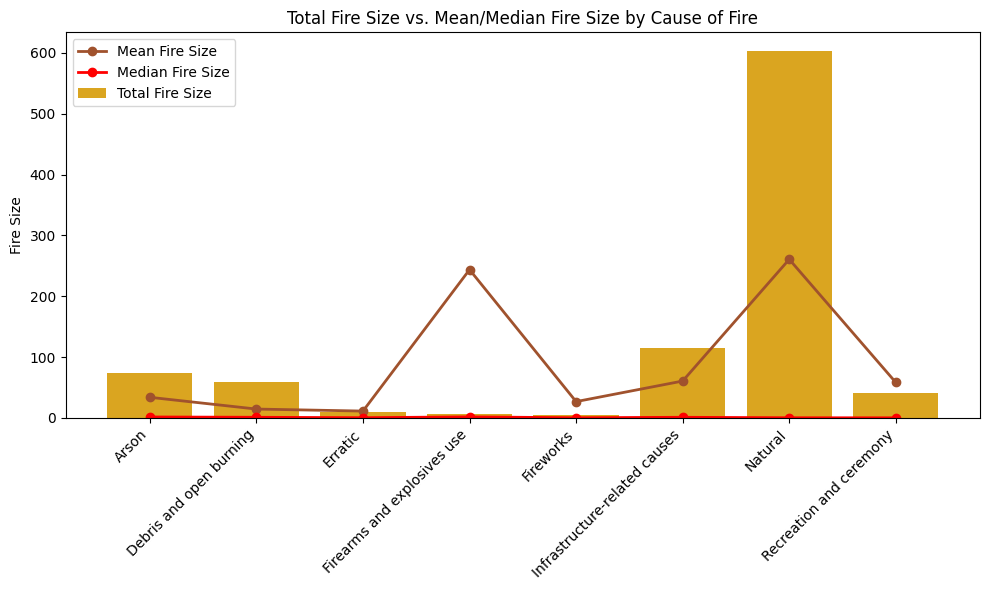

In [ ]:
# Extract data from the DataFrame
causes = merged_df_size['NWCG_GENERAL_CAUSE']
total_fire_size = merged_df_size['SUM_FIRE_SIZE']
mean_fire_size = merged_df_size['MEAN_FIRE_SIZE']
median_fire_size = merged_df_size['MEDIAN_FIRE_SIZE']

# Plot bars for total fire size
plt.figure(figsize=(10, 6))
plt.bar(causes, total_fire_size, color='goldenrod', label='Total Fire Size')

# Plot lines for mean and median fire size
plt.plot(causes, mean_fire_size, marker='o', color='sienna', label='Mean Fire Size', linewidth=2)
plt.plot(causes, median_fire_size, marker='o', color='red', label='Median Fire Size', linewidth=2)

# Add labels and title
plt.xlabel('')
plt.ylabel('Fire Size')
plt.title('Total Fire Size vs. Mean/Median Fire Size by Cause of Fire')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
cause_duration_sum= presentation_df.groupby('NWCG_GENERAL_CAUSE')['DURATION'].sum().reset_index()

cause_duration_sum

,NWCG_GENERAL_CAUSE,DURATION
0,Arson,63230.0
1,Debris and open burning,85021.0
2,Erratic,25469.0
3,Firearms and explosives use,1462.0
4,Fireworks,9513.0
5,Infrastructure-related causes,64770.0
6,Natural,572501.0
7,Recreation and ceremony,47992.0


In [ ]:
cause_duration_mean= presentation_df.groupby('NWCG_GENERAL_CAUSE')['DURATION'].mean().reset_index()

cause_duration_mean

,NWCG_GENERAL_CAUSE,DURATION
0,Arson,0.288587
1,Debris and open burning,0.209475
2,Erratic,0.297681
3,Firearms and explosives use,0.603384
4,Fireworks,0.618691
5,Infrastructure-related causes,0.339451
6,Natural,2.472505
7,Recreation and ceremony,0.685757


<ipython-input-63-08d41338abd7>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




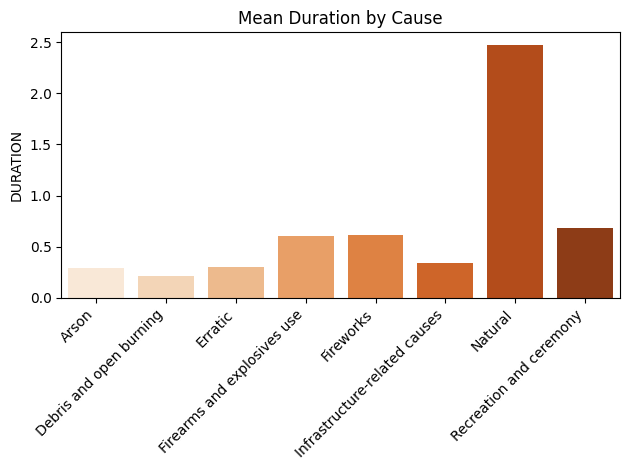

In [ ]:
# Plot
sns.barplot(data=cause_duration_mean, x='NWCG_GENERAL_CAUSE', y='DURATION', palette='Oranges')

plt.xlabel('')
plt.ylabel('DURATION')
plt.title('Mean Duration by Cause')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
cause_duration_median= presentation_df.groupby('NWCG_GENERAL_CAUSE')['DURATION'].median().reset_index()

cause_duration_median

,NWCG_GENERAL_CAUSE,DURATION
0,Arson,0.0
1,Debris and open burning,0.0
2,Erratic,0.0
3,Firearms and explosives use,0.0
4,Fireworks,0.0
5,Infrastructure-related causes,0.0
6,Natural,0.0
7,Recreation and ceremony,0.0


In [ ]:
fire_cause_day_of_week_counts = presentation_df.groupby(['NWCG_GENERAL_CAUSE', 'DAY_WEEK']).size().reset_index(name='count')

fire_cause_day_of_week_counts = fire_cause_day_of_week_counts.sort_values(by=['NWCG_GENERAL_CAUSE', 'count'], ascending=[True, False])

fire_cause_day_of_week_counts

,NWCG_GENERAL_CAUSE,DAY_WEEK,count
3,Arson,Sunday,34657
2,Arson,Saturday,33849
1,Arson,Monday,31453
0,Arson,Friday,29853
6,Arson,Wednesday,29805
5,Arson,Tuesday,29757
4,Arson,Thursday,29728
9,Debris and open burning,Saturday,70700
8,Debris and open burning,Monday,58077
7,Debris and open burning,Friday,55706


fire arms and explosive use

recreation and ceremony

fireworks (+-)

debris (- - - +)

In [ ]:
fire_cause_state_counts = presentation_df.groupby(['NWCG_GENERAL_CAUSE', 'STATE']).size().reset_index(name='count')

fire_cause_state_counts

,NWCG_GENERAL_CAUSE,STATE,count
0,Arson,AL,16858
1,Arson,AR,8813
2,Arson,AZ,3979
3,Arson,CA,16898
4,Arson,CO,812
...,...,...,...
360,Recreation and ceremony,VT,107
361,Recreation and ceremony,WA,4929
362,Recreation and ceremony,WI,1469
363,Recreation and ceremony,WV,416


In [ ]:
fire_cause_state_counts = fire_cause_state_counts.merge(fires_by_state, on='STATE')

fire_cause_state_counts

,NWCG_GENERAL_CAUSE,STATE,count,Number of Fires
0,Arson,AL,16858,50869
1,Debris and open burning,AL,15340,50869
2,Erratic,AL,1434,50869
3,Fireworks,AL,60,50869
4,Infrastructure-related causes,AL,3962,50869
...,...,...,...,...
360,Firearms and explosives use,WY,28,14012
361,Fireworks,WY,674,14012
362,Infrastructure-related causes,WY,1574,14012
363,Natural,WY,5485,14012


In [ ]:
fire_cause_state_counts['percentage'] = (fire_cause_state_counts['count'] / fire_cause_state_counts['Number of Fires']) * 100

fire_cause_state_counts

,NWCG_GENERAL_CAUSE,STATE,count,Number of Fires,percentage
0,Arson,AL,16858,50869,33.140026
1,Debris and open burning,AL,15340,50869,30.155891
2,Erratic,AL,1434,50869,2.819006
3,Fireworks,AL,60,50869,0.117950
4,Infrastructure-related causes,AL,3962,50869,7.788634
...,...,...,...,...,...
360,Firearms and explosives use,WY,28,14012,0.199829
361,Fireworks,WY,674,14012,4.810163
362,Infrastructure-related causes,WY,1574,14012,11.233229
363,Natural,WY,5485,14012,39.145019


In [ ]:
# Group by NWCG_GENERAL_CAUSE
grouped = fire_cause_state_counts.groupby('NWCG_GENERAL_CAUSE')

# Create an empty list to store the result
top_states_per_cause = []

# Iterate over each group
for name, group in grouped:
    # Get the top 10 states with the highest percentage for each cause
    top_states = group.nlargest(1, 'percentage')
    # Append the result to the list
    top_states_per_cause.append(top_states)

# Concatenate the list of DataFrames along the rows
top_states_per_cause = pd.concat(top_states_per_cause, ignore_index=True)



top_states_per_cause

,NWCG_GENERAL_CAUSE,STATE,count,Number of Fires,percentage
0,Arson,OK,16923,36179,46.775754
1,Debris and open burning,GA,69929,121173,57.710051
2,Erratic,NJ,4786,21988,21.766418
3,Firearms and explosives use,ID,1097,28314,3.874408
4,Fireworks,SD,2724,29911,9.107017
5,Infrastructure-related causes,MI,4380,16148,27.124102
6,Natural,UT,18028,30585,58.943927
7,Recreation and ceremony,WA,4929,29566,16.671176


In [ ]:
# Calculate total count of all causes
total_count = presentation_df['NWCG_GENERAL_CAUSE'].value_counts().sum()

# Calculate percentages for each cause
cause_percentages = (presentation_df['NWCG_GENERAL_CAUSE'].value_counts() / total_count * 100).reset_index().rename(columns={'count': 'us_percentage'})

# Display the result
cause_percentages

,NWCG_GENERAL_CAUSE,us_percentage
0,Debris and open burning,33.250210
1,Natural,18.968767
2,Arson,17.949249
3,Infrastructure-related causes,15.631352
4,Erratic,7.009073
5,Recreation and ceremony,5.733221
6,Fireworks,1.259631
7,Firearms and explosives use,0.198497


In [ ]:
merged_df_percentage = pd.merge(top_states_per_cause, cause_percentages, on='NWCG_GENERAL_CAUSE', how='left')

merged_df_percentage

,NWCG_GENERAL_CAUSE,STATE,count,Number of Fires,percentage,us_percentage
0,Arson,OK,16923,36179,46.775754,17.949249
1,Debris and open burning,GA,69929,121173,57.710051,33.250210
2,Erratic,NJ,4786,21988,21.766418,7.009073
3,Firearms and explosives use,ID,1097,28314,3.874408,0.198497
4,Fireworks,SD,2724,29911,9.107017,1.259631
5,Infrastructure-related causes,MI,4380,16148,27.124102,15.631352
6,Natural,UT,18028,30585,58.943927,18.968767
7,Recreation and ceremony,WA,4929,29566,16.671176,5.733221


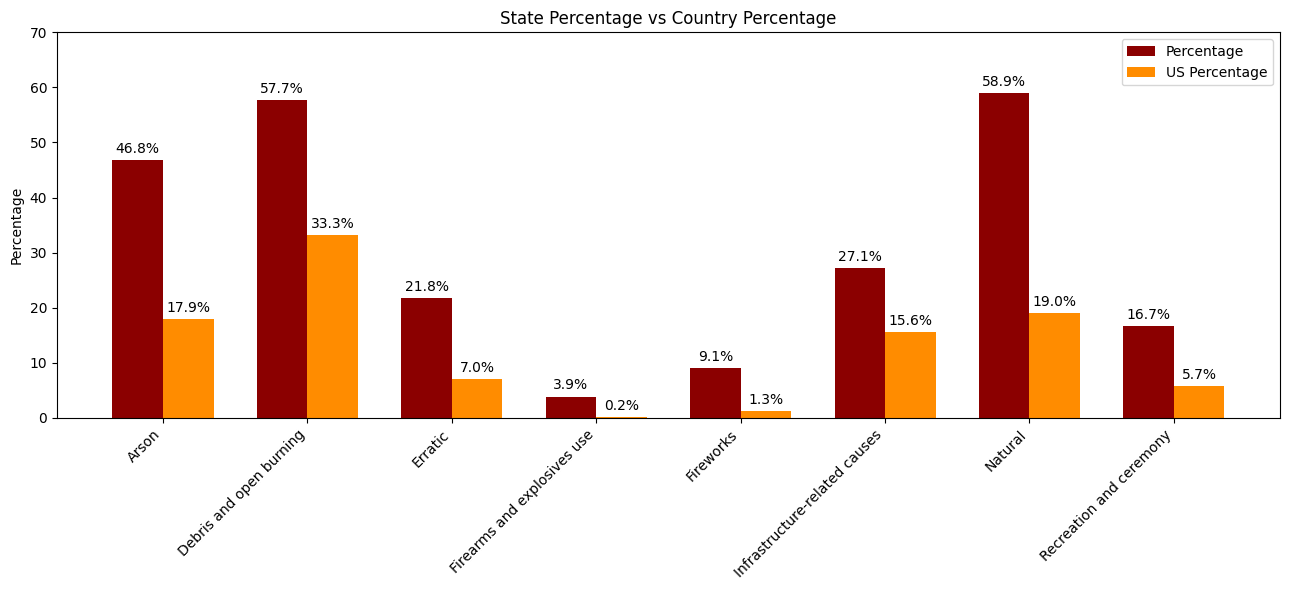

In [ ]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(13, 6))

# Define the number of bars
N = len(merged_df_percentage)

# Width of a single bar
width = 0.35

# Array of indices for the x-axis
ind = np.arange(N)

# Plot the bars for percentage
bar1 = ax.bar(ind, merged_df_percentage['percentage'], width, label='Percentage', color ='darkred')

# Plot the bars for US percentage
bar2 = ax.bar(ind + width, merged_df_percentage['us_percentage'], width, label='US Percentage', color ='darkorange')

# Add labels, title, and legend
ax.set_xlabel('')
ax.set_ylabel('Percentage')
ax.set_title('State Percentage vs Country Percentage')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(merged_df_percentage['NWCG_GENERAL_CAUSE'])
ax.legend()

# Function to display percentages on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# Call the function to display percentages for both sets of bars
autolabel(bar1)
autolabel(bar2)

# Set y-axis limits
ax.set_ylim(0, 70)

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-91-83675981abfa>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




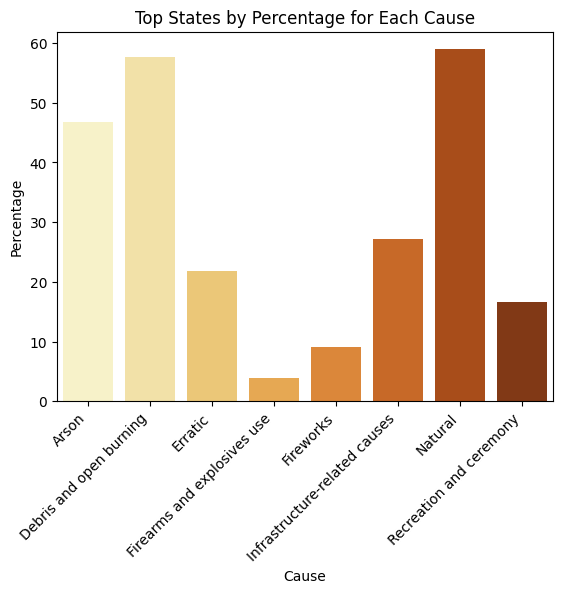

In [ ]:
# Pivot the DataFrame to prepare for plotting
pivot_df = top_states_per_cause.pivot(index='NWCG_GENERAL_CAUSE', columns='STATE', values='percentage').fillna(0)

# Plot the stacked bar chart
sns.barplot(data=top_states_per_cause, x='NWCG_GENERAL_CAUSE', y='percentage', palette='YlOrBr')
plt.title('Top States by Percentage for Each Cause')
plt.xlabel('Cause')
plt.ylabel('Percentage')
#plt.legend(title='STATE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
!pip install squarify

In [ ]:
import squarify

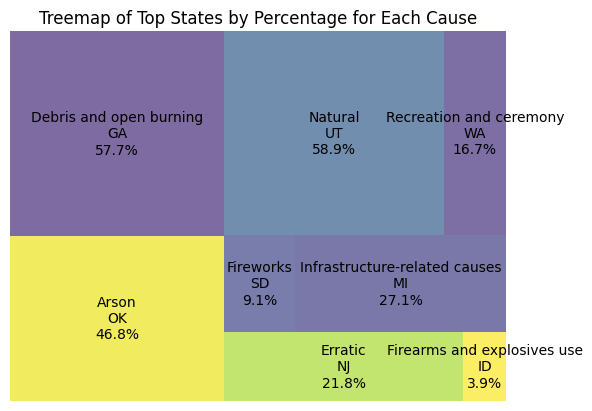

In [ ]:

# Define the dataset
data = {
    'NWCG_GENERAL_CAUSE': ['Arson', 'Debris and open burning', 'Erratic', 'Firearms and explosives use', 'Fireworks', 'Infrastructure-related causes', 'Natural', 'Recreation and ceremony'],
    'STATE': ['OK', 'GA', 'NJ', 'ID', 'SD', 'MI', 'UT', 'WA'],
    'count': [16923, 69929, 4786, 1097, 2724, 4380, 18028, 4929],
    'Number of Fires': [36179, 121173, 21988, 28314, 29911, 16148, 30585, 29566],
    'percentage': [46.775754, 57.710051, 21.766418, 3.874408, 9.107017, 27.124102, 58.943927, 16.671176]
}

# Create DataFrame
top_states_per_cause = pd.DataFrame(data)

# Create labels for treemap
labels = [f"{cause}\n{state}\n{percentage:.1f}%" for cause, state, percentage in zip(top_states_per_cause['NWCG_GENERAL_CAUSE'], top_states_per_cause['STATE'], top_states_per_cause['percentage'])]

# Plot treemap
squarify.plot(sizes=top_states_per_cause['percentage'], label=labels, alpha=0.7)
plt.axis('off')
plt.title('Treemap of Top States by Percentage for Each Cause')
plt.show()


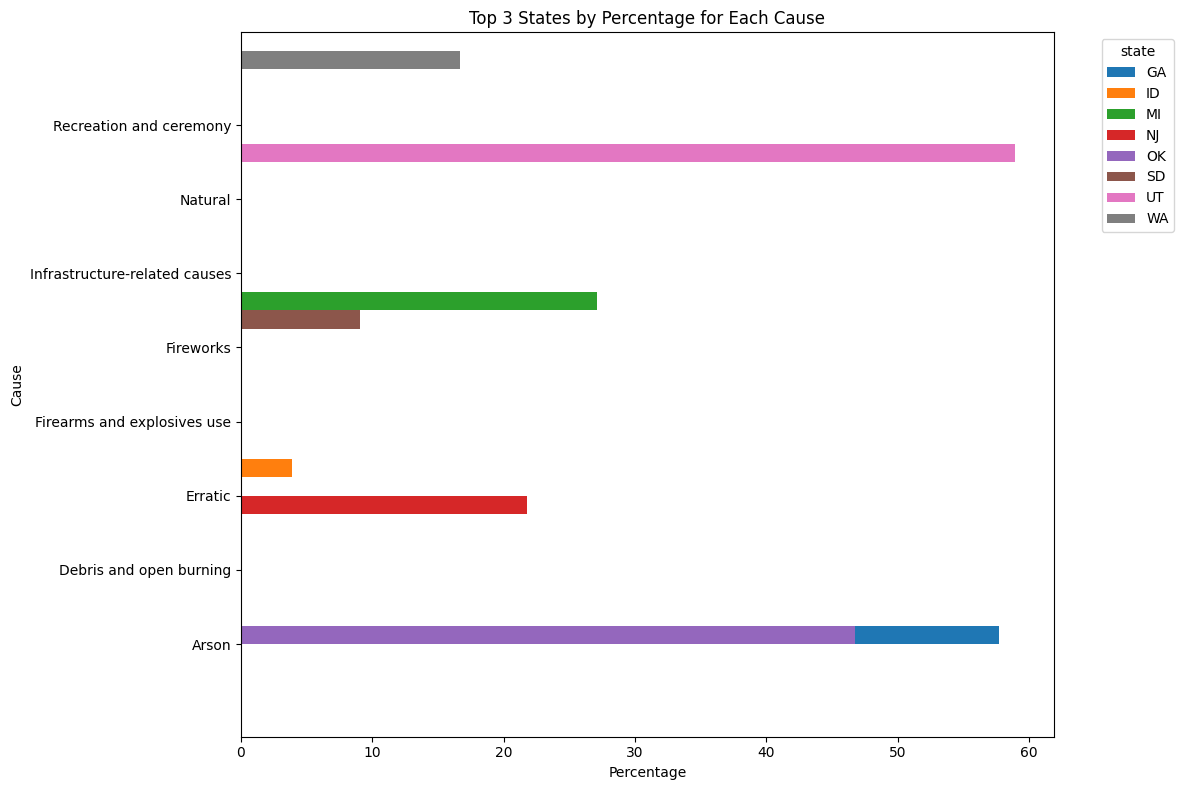

In [ ]:
# Plot the horizontal grouped bar chart
pivot_df.plot(kind='barh', stacked=False, figsize=(12, 8), width=2)
plt.title('Top 3 States by Percentage for Each Cause')
plt.ylabel('Cause')
plt.xlabel('Percentage')
plt.legend(title='state', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

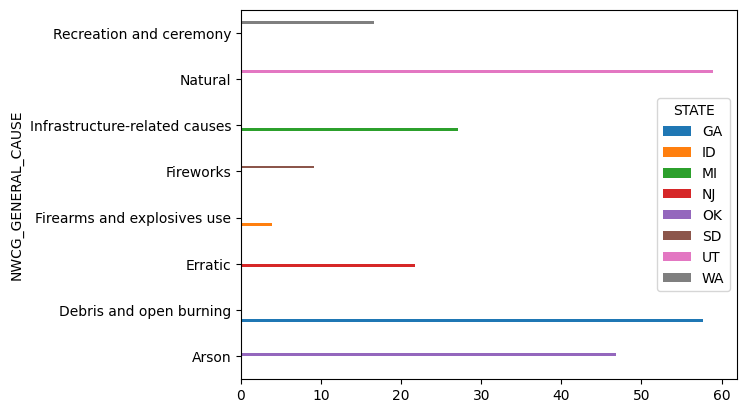

In [ ]:
ax = pivot_df.plot.barh()

In [ ]:
# Create a treemap for each cause
for cause in top_states_per_cause['NWCG_GENERAL_CAUSE'].unique():
    # Filter data for the current cause
    cause_data = top_states_per_cause[top_states_per_cause['NWCG_GENERAL_CAUSE'] == cause]

    # Create a treemap
    fig = px.treemap(cause_data, path=['NWCG_GENERAL_CAUSE', 'STATE'], values='percentage',
                     title=f'Treemap for {cause}',
                     color='percentage', color_continuous_scale='RdBu',)

    # Adjust the aspect ratio by setting the width and height of the figure
    fig.update_layout(width=800, height=800)

    # Show the treemap
    fig.show()

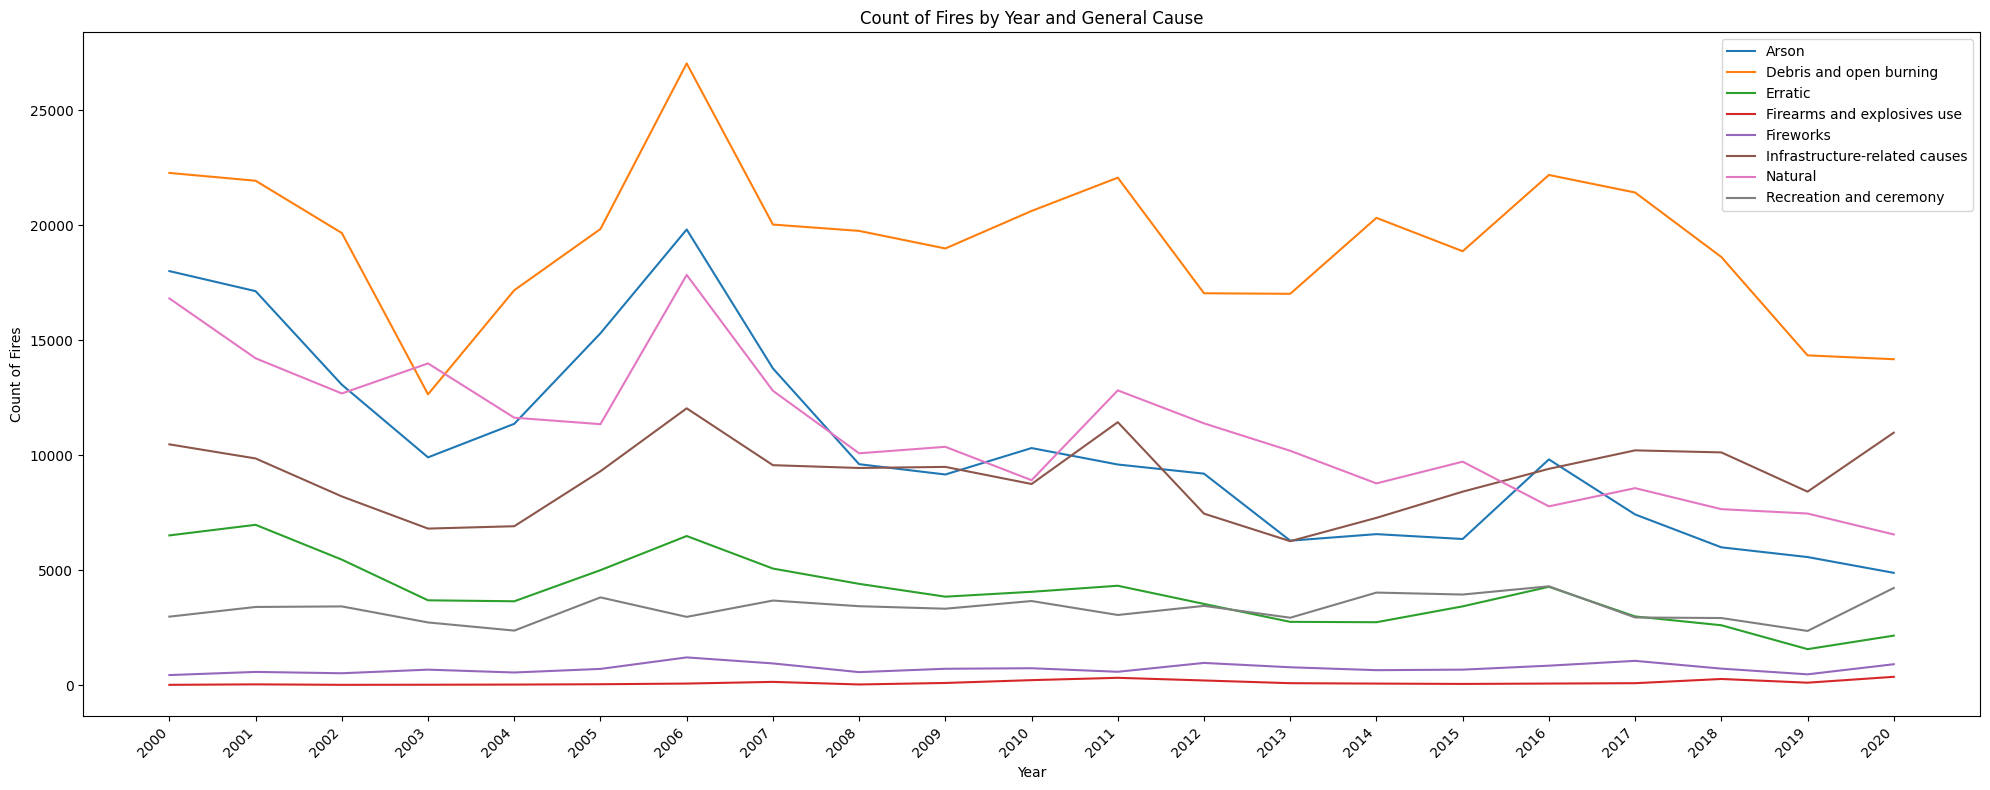

In [ ]:
# Group data by 'FIRE_YEAR' and 'NWCG_GENERAL_CAUSE' and get the count of fires
count_per_year_cause = presentation_df.groupby(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE']).size().unstack(fill_value=0)

# Plot lines for each general cause of fire
plt.figure(figsize=(20, 8))
for cause in count_per_year_cause.columns:
    plt.plot(count_per_year_cause.index, count_per_year_cause[cause], label=cause)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count of Fires')
plt.title('Count of Fires by Year and General Cause')
plt.xticks(count_per_year_cause.index)  # Set x-axis ticks to years

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Random Forest - Best Model

In [ ]:
presentation_df.columns


Index(['FIRE_YEAR', 'DISCOVERY_DATE', 'NWCG_GENERAL_CAUSE', 'CONT_DATE',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'DURATION',
       'STATE', 'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'COUNTY_STATE', 'DAY_WEEK', 'DAY_YEAR'],
      dtype='object')

In [ ]:
to_drop2 = ['LATITUDE', 'LONGITUDE','DISCOVERY_DATE','CONT_DATE', 'FIRE_SIZE_CLASS' ]

rf_model_df = presentation_df.drop(to_drop2, axis=1)

rf_model_df.columns

Index(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'DURATION', 'STATE',
       'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'COUNTY_STATE', 'DAY_WEEK', 'DAY_YEAR'],
      dtype='object')

In [ ]:
rf_model_df['COUNTY_STATE'] = rf_model_df['COUNTY_STATE'].astype('category')
rf_model_df['COUNTY_STATE'] = rf_model_df['COUNTY_STATE'].cat.codes.astype(int)

rf_model_df['STATE'] = rf_model_df['STATE'].astype('category')
rf_model_df['STATE'] = rf_model_df['STATE'].cat.codes.astype(int)

rf_model_df['DAY_WEEK'] = rf_model_df['DAY_WEEK'].astype('category')
rf_model_df['DAY_WEEK'] = rf_model_df['DAY_WEEK'].cat.codes.astype(int)

rf_model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1220675 entries, 0 to 1682339
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   FIRE_YEAR           1220675 non-null  int64  
 1   NWCG_GENERAL_CAUSE  1220675 non-null  object 
 2   FIRE_SIZE           1220675 non-null  float64
 3   DURATION            1220675 non-null  float64
 4   STATE               1220675 non-null  int64  
 5   PRECIPITATION       1220675 non-null  float64
 6   TEMPERATURE         1220675 non-null  float64
 7   WIND_SPEED          1220675 non-null  float64
 8   ELEVATION           1220675 non-null  int64  
 9   COUNTY_STATE        1220675 non-null  int64  
 10  DAY_WEEK            1220675 non-null  int64  
 11  DAY_YEAR            1220675 non-null  int32  
dtypes: float64(5), int32(1), int64(5), object(1)
memory usage: 116.4+ MB


In [ ]:
rf_model_df['NWCG_GENERAL_CAUSE'] = rf_model_df['NWCG_GENERAL_CAUSE'].replace({'Other causes': 'Undetermined',
                                                                             'Undetermined': 'Undetermined',
                                                                             'Railroad operations and maintenance': 'Infrastructure-related causes',
                                                                             'Power supply': 'Infrastructure-related causes',
                                                                             'Equipment and vehicle use': 'Infrastructure-related causes',
                                                                             'Smoking': 'Erratic',
                                                                             'Misuse of fire by a minor': 'Erratic'})
rf_model_df = rf_model_df[rf_model_df['NWCG_GENERAL_CAUSE']!= 'Undetermined']


rf_model_df['NWCG_GENERAL_CAUSE'].value_counts()

NWCG_GENERAL_CAUSE
Debris and open burning          405877
Natural                          231547
Arson                            219102
Infrastructure-related causes    190808
Erratic                           85558
Recreation and ceremony           69984
Fireworks                         15376
Firearms and explosives use        2423
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler

from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

import time

In [ ]:
ros = RandomOverSampler(random_state=0)

X = rf_model_df.drop("NWCG_GENERAL_CAUSE", axis=1)
y = rf_model_df["NWCG_GENERAL_CAUSE"]

X_resampled, y_resampled = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
start_time = time.time()

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

print(f"Random Forest Accuracy Score: {rf_acc}, F1-Score: {rf_f1}")


print("--- %s seconds ---" % round(time.time() - start_time, 2))


Random Forest Accuracy Score: 0.9045247642453697, F1-Score: 0.9024089694024526
--- 1068.96 seconds ---


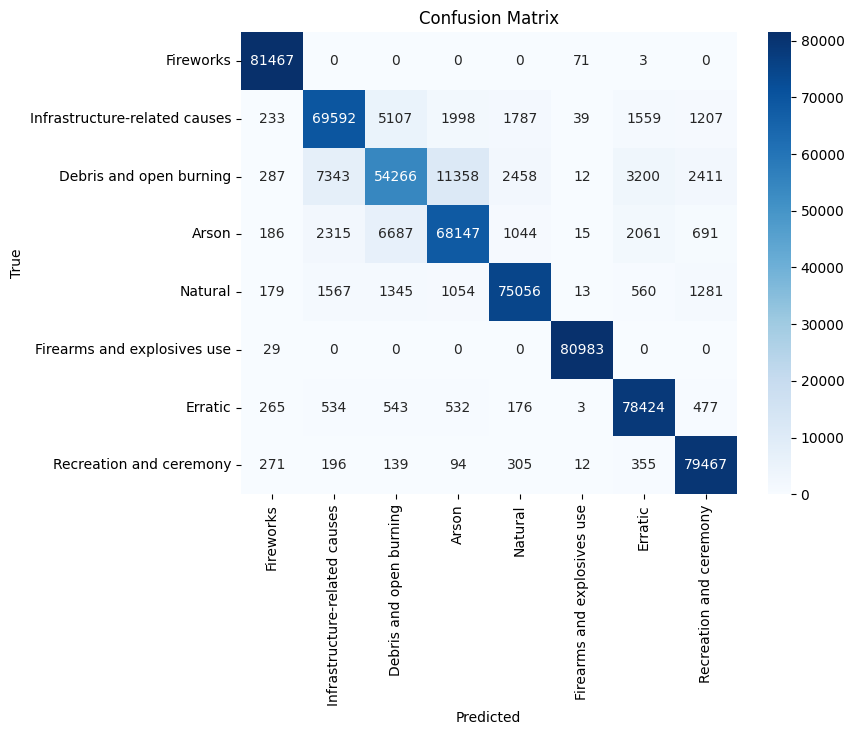

In [ ]:
# Make a correlation matrix
labels = y_test.value_counts().index
cm = confusion_matrix(y_test, rf_predictions, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
report = classification_report(y_test, rf_predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Arson,0.819242,0.839807,0.829397,81146.000000
Debris and open burning,0.797010,0.667191,0.726346,81335.000000
Erratic,0.910192,0.968748,0.938558,80954.000000
Firearms and explosives use,0.997967,0.999642,0.998804,81012.000000
Fireworks,0.982513,0.999092,0.990733,81541.000000
Infrastructure-related causes,0.853397,0.853659,0.853528,81522.000000
Natural,0.928612,0.925989,0.927298,81055.000000
Recreation and ceremony,0.929069,0.983028,0.955287,80839.000000
accuracy,0.904525,0.904525,0.904525,0.904525
macro avg,0.902250,0.904645,0.902494,649404.000000


In [ ]:
feature_importances = pd.DataFrame(
    rf.feature_importances_,
    index =X_train.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

feature_importances

,importance
DAY_YEAR,0.137346
ELEVATION,0.133793
COUNTY_STATE,0.118617
TEMPERATURE,0.114326
WIND_SPEED,0.102532
FIRE_SIZE,0.090873
PRECIPITATION,0.078147
FIRE_YEAR,0.077722
STATE,0.076462
DAY_WEEK,0.049941


<ipython-input-78-79651577384f>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-78-79651577384f>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-78-79651577384f>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-78-79651577384f>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-78-79651577384f>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

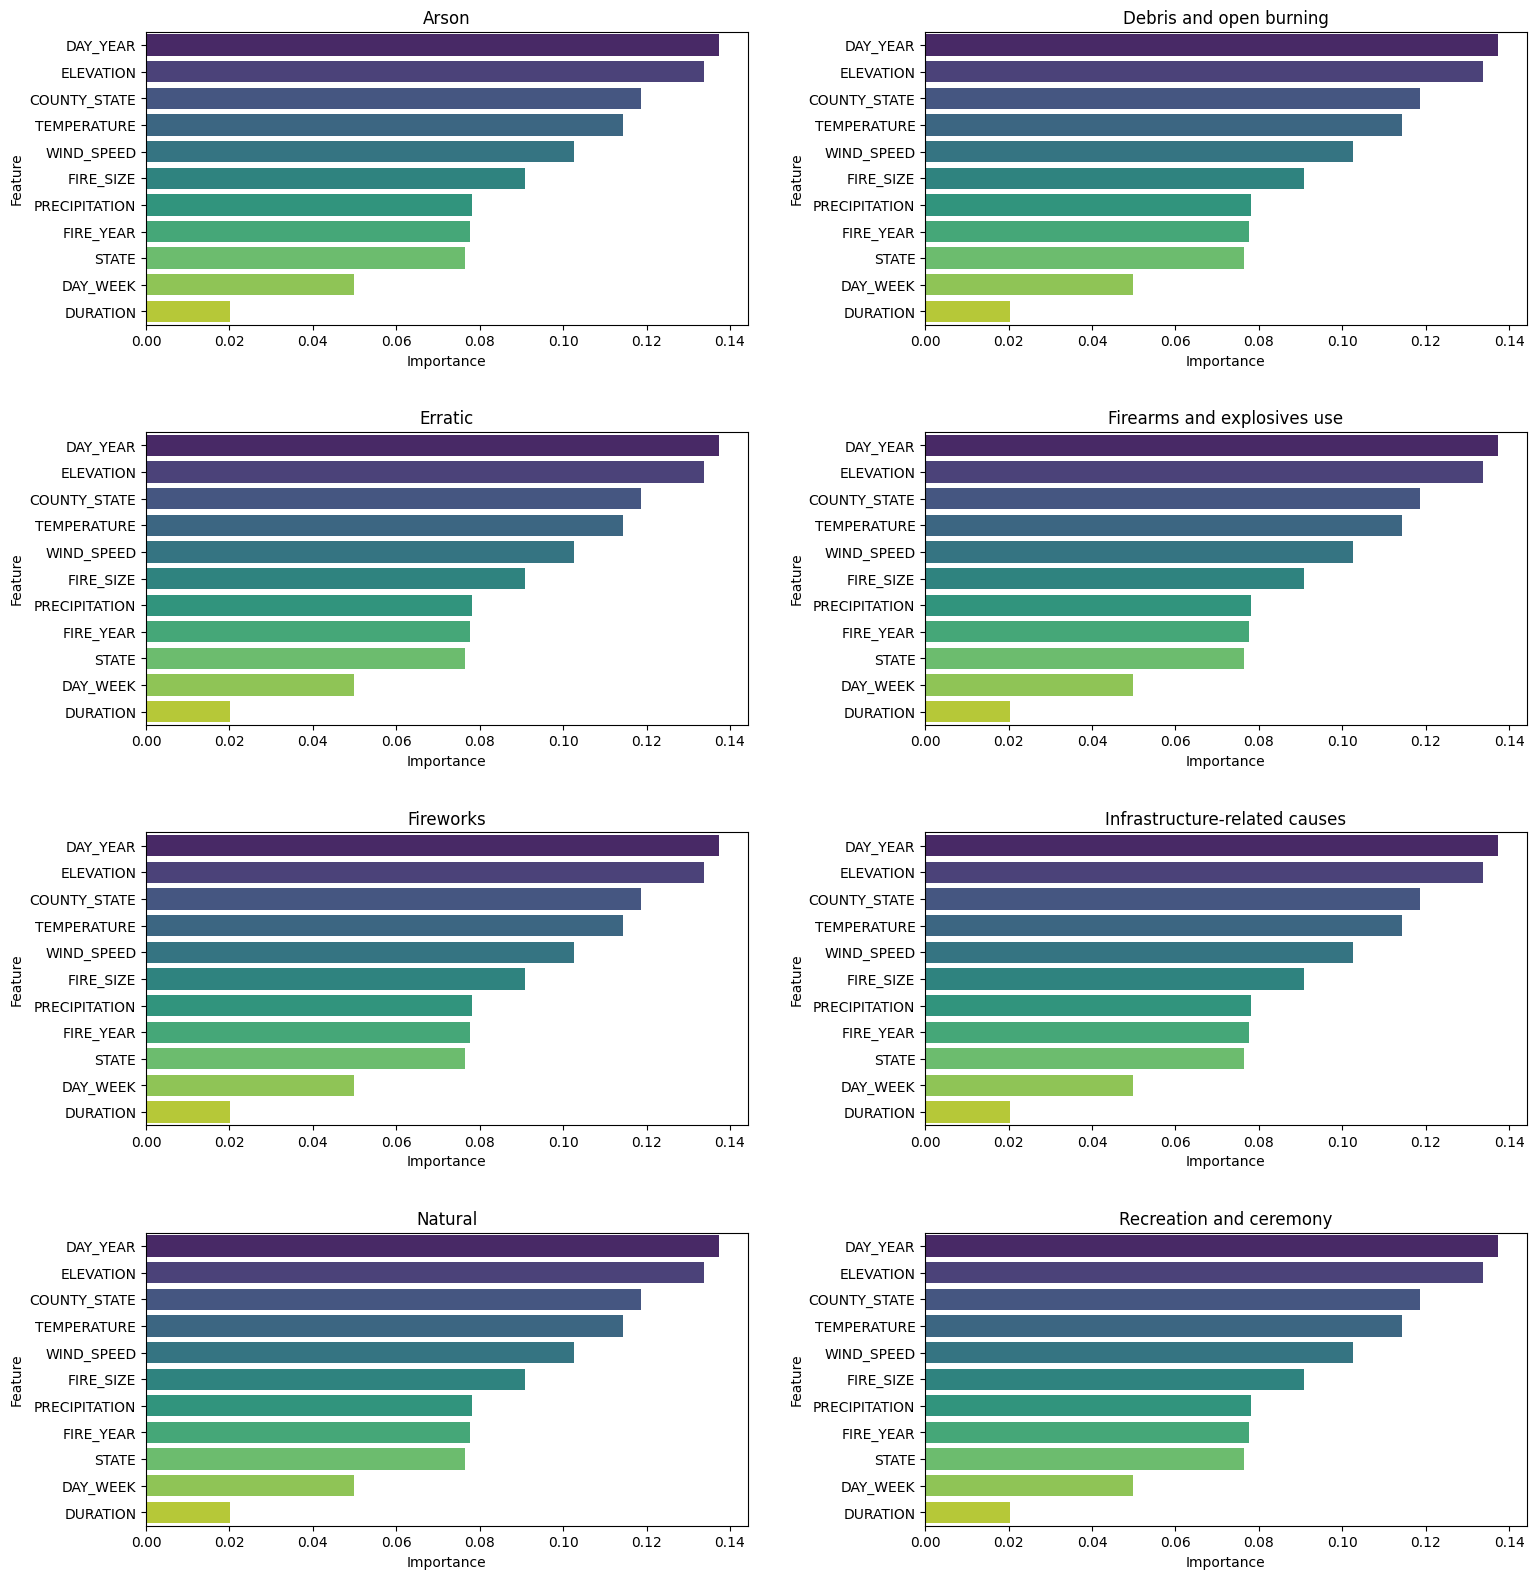

In [ ]:
# Plot feature importances for each class
plt.figure(figsize=(16, 20))  # Set the figure size
for class_label in report_df.index[:-3]:  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
    # Create a subplot
    plt.subplot(5, 2, report_df.index[:-3].tolist().index(class_label) + 1)  # Determine subplot position

    # Filter feature importances for the current class
    class_feature_importances = feature_importances  # No filtering needed

    # Select top 10 features (adjust as needed)
    top_features = class_feature_importances.sort_values(by='importance', ascending=False).head(11)

    # Create a bar plot
    sns.barplot(x='importance', y=top_features.index, data=top_features, palette='viridis')
    plt.title(class_label)
    plt.xlabel('Importance')
    plt.ylabel('Feature')

plt.tight_layout(pad=3.0)  # Adjust layout
plt.show()